# Inverse Problems: The Bayesian Approach 

For many problems in imaging, we are interested in recovering an image of interest, $x \in \mathbb{R}^d$, from a set of measurements $y \in \mathbb{R}^d$. These two are related through a statistical model with likelihood function
of the form

$$p(y|x,\sigma^2) = e^{-f^{\sigma^2}_{y}(x)}\,\,,$$

where $f^{\sigma^2}_{y}$ is convex and continuously differentiable with $L_{y}$-Lipschitz gradient. This class includes important observation models, in particular Gaussian linear models of the form

$$y = Ax + w\,\,,$$ 

where $A \in \mathbb{R}^{d \times d}$ is a linear operator and $w \sim N(0, \sigma^2 I_d)$ is a noise term.  Here, we study the case where both $A$ and the noise variance $\sigma>0$ are known. 

However, the recovery of $x$ from $y$ is often ill posed or ill conditioned, so regularisation is required in order to deliver meaningful solutions. In the Bayesian framework, this is achieved by using prior knowledge about $x$. We consider prior distributions given for any $x\in\mathbb{R}^{d}$ and $\theta\in \Theta_\theta\subset (0,+\infty)$ by

$$p(x|\theta) = e^{-\theta g(x)}/Z(\theta)\,\,,$$

for some function $g: \mathbb{R}^{d} → \mathbb{R}$ that is proper, convex but potentially not smooth. The normalising constant $Z(\theta)$ is given by

$$Z(\theta)=\int_{\mathbb{R}^{d}}e^{-\theta g(\tilde{x})}d\tilde{x}\,\,.$$

The parameter $\theta$ controls the amount of regularity enforced. This parameter is difficult to set a priori, ***so the purpose of this tutorial is to implement a stochastic approximation proximal gradient algorithm to estimate $\theta$ and $\sigma^2$ directly from $y$ by maximum marginal likelihood estimation.***

# Bayesian Inference

Once the likelihood and prior $p(y|x,\sigma^2)$ and $p(x|\theta)$ are defined, we use Bayes’ theorem to derive the posterior for any $x\in\mathbb{R}^{d}$, $\theta\in\Theta_\theta$ and $\sigma^2\in\Theta_{\sigma^2}\,\,,$

$$p(x|y,\theta,\sigma^2) = \dfrac{p(y|x,\sigma^2)p(x|\theta)}{p(y|\theta,\sigma^2)} \propto e^{-f^{\sigma^2}_{y}(x) + \theta g(x)}\,\,.$$

The posterior distribution describe how $x$ is affected by the data $y$.
Many imaging methods typically use the maximum-a-posteriori (MAP) estimator, given for any $\theta\in\Theta_\theta$ and $\sigma^2\in\Theta_{\sigma^2}$ by

$$\hat{x}_{\theta,\sigma^2,MAP} = \mathrm{arg min}_{\tilde{x}\in\mathbb{R}^{d}}\{f^{\sigma^2}_{y}(\tilde{x})+\theta g(\tilde{x})\}$$

From a computation viewpoint, if the posterior $p(x|y,\theta)$ is log-concave, the computation of $\hat{x}_{\theta,\sigma^2,MAP}$ is a convex optimisation problem
that can usually be efficiently solved using modern optimisation algorithms. However, $g$ might not be smooth. In this case, imaging MAP algorithms 
typically adopt a proximal splitting approach involving the gradient $\nabla f^{\sigma^2}_{y}$ and the proximal operator $\mathrm{prox}_{g}^{\lambda} : \mathbb{R}^{d} \rightarrow \mathbb{R}^{d}$ of $g$. The operator is defined for any $\lambda>0$ and $x\in \mathbb{R}^{d}$ as

$$\mathrm{prox}_{g}^{\lambda}(x) = \mathrm{arg min}_{\tilde{x}\in\mathbb{R}^{d}}\left\{g(\tilde{x}) + \dfrac{1}{2\lambda}||\tilde{x}-x||^{2}\right\}\,\,.$$

where the smoothness parameter $\lambda>0$ controls the regularity properties of the proximal operator. In some cases, the proximal operator is given in closed-form. Otherwise, it is calculated by using specialized algorithms.

In problems that are ill-posed or ill-conditioned, the value of $\theta$ can significantly impact our inferences about $x$. Here we adopt an empirical Bayesian strategy that seeks to estimate $\theta$ directly from $y$.

# Empirical Bayes estimation

Adopting an empirical Bayesian approach, the regularisation parameter $\theta$ is estimated directly from the observed data $y$ by maximum marginal likelihood estimation, i.e.,

$$\theta^{*}, \sigma^{*2} = \mathrm{argmax}_{\theta\in\Theta_\theta,\sigma^2\in\Theta_{\sigma^2}}\,\,p(y|\theta,\sigma^2)\,\,,$$

where we recall that the marginal likelihood $p(y|\theta,\sigma^2)$ is given for any $\theta\in\Theta_\theta$ and $\sigma^2\in\Theta_{\sigma^2}$ by 

$$p(y|\theta,\sigma^2) = \int_{\mathbb{R}^{d}}p(y|\tilde{x},\sigma^2)p(\tilde{x}|\theta)d\tilde{x}\,\,.$$

***So, if we can calculate $\theta^{*}$, we can then plug it into our imaging MAP algorithm!***

**Suppose for now that $p(y|\theta,\sigma^2)$ was tractable** and that we had access to the gradients $\nabla_{\theta} \log p(y|\theta,\sigma^2)$, and  $\nabla_{\sigma^2} \log p(y|\theta,\sigma^2)$. Recalling that $\Theta_\theta$ and $\Theta_{\sigma^2}$ are a convex compact set, we could use the projected gradient algorithm. For $\theta_0 \in \Theta_\theta$ and $\sigma^2_0 \in \Theta_{\sigma^2}$, for all $n \in \mathbb{N}$

$$\theta_{n+1} = \Pi_{\Theta_\theta}[\theta_{n} - \delta_{n}\nabla_{\theta}\log p(y|\theta_{n},\sigma_n^2)]$$
$$\sigma^2_{n+1} = \Pi_{\Theta_{\sigma^2}}[\sigma^2_{n} - \delta_{n}\nabla_{\sigma^2}\log p(y|\theta_{n},\sigma_n^2)].$$
Here $\Pi_{\Theta_\theta}$ and $\Pi_{\Theta_{\sigma^2}}$ are projection operators such that $\Pi_{\Theta_\theta}(\theta)$ is the closest point in $\Theta$ to $\theta$ ($\Pi_{\Theta_\sigma^2}$ is defined similarly). 
**Since $\nabla_{\theta} \log p(y|\theta,\sigma^2)$ and $\nabla_{\sigma^2} \log p(y|\theta,\sigma^2)$ are not tractable** (due to the high dimensional integral in $p(y|\theta,\sigma^2)$), we cannot directly use the above algorithm and we choose a stochastic variant of the projected gradient algorithm. For this purpose, we use the Fisher Identity to rewrite the gradient as follows 

$$\nabla_{\theta}\log p(y|\theta,\sigma^2) = -\int_{\mathbb{R}^{d}}g(\tilde{x})p(\tilde{x}|y,\theta,\sigma^2)d\tilde{x} - \nabla_{\theta}\log (Z(\theta))\,\,,$$

and by using Monte Carlo simulations

$$\nabla_{\theta}\log p(y|\theta\sigma^2) \approx - \dfrac{1}{m}\sum_{i=1}^{m}g(X_{i}) - \nabla_{\theta}\log (Z(\theta)) = \Delta_{m,\theta}\,\,,$$

where $(X_{k})_{k=1}^{m}$ is a sample of size $m\in\mathbb{N}^{*}$ generated by using a Markov Chain targeting $p(x|y,\theta)$, or a regularised approximation of this density.

**The last term that remains** is the $\nabla_{\theta}\log (Z(\theta))$. Assume that there exists an integer $\alpha$ such that $g$ is $\alpha$ positively homogeneous function, i.e. for any $x\in\mathbb{R}^{d}$ and $t>0$, $g(tx) = t^{\alpha}g(x)$, and recalling that $ \Theta_\theta \subseteq (0,+\infty)$ we have for any $\theta\in\Theta_\theta$

$$Z(\theta) = \int_{\mathbb{R}^{d}}e^{-\theta g(\tilde{x})}d\tilde{x} = \int_{\mathbb{R}^{d}}e^{- g(\theta^{1/\alpha}\tilde{x})}d\tilde{x} =
\theta^{-d/\alpha}\int_{\mathbb{R}^{d}}e^{g(\tilde{x})}d\tilde{x}\,\,,$$

and so,

$$\dfrac{d}{d\theta}\log Z(\theta) = -\dfrac{d}{\alpha\theta}.$$

Now, we can calculate $\Delta_{m,\theta}= - \dfrac{1}{m}\sum_{i=1}^{m}g(X_{i}) + \dfrac{d}{\alpha\theta}\,\,.$

Similarly, we approximate the gradient $\nabla_{\sigma^2}\log p(y|\theta\sigma^2)$ by

$$\nabla_{\sigma^2}\log p(y|\theta,\sigma^2) \approx \Delta_{m,\sigma^2}= \dfrac{1}{m}\sum_{i=1}^{m}\nabla_{\sigma^2}f_y^{\sigma^2}(X_i) - \dfrac{d}{2\sigma^2}$$

# Markov Chain Monte Carlo (MCMC) methodology in imaging inverse problems

The question that arises here is how can we sample from the posterior? One common approach is to solve the overdamped Langevin stochastic differential equation (SDE)

$$dX_{t} = \nabla \log p(X_{t}|y,\theta,\sigma^2) dt + \sqrt{2}W_{t}=
\nabla \log p(y|X_{t},\sigma^2)dt + \nabla \log p(X_{t}|\theta)dt+ \sqrt{2}W_{t}$$

where $(W_{t})_{t\geq0}$ is a d-dimensional Brownian motion. Under mild conditions, the above SDE has a unique strong solution $(X_{t})_{t>0}$ that admits the posterior of interest $p(x|y,\theta,\sigma^2)$ as unique stationary density.

In high dimensions, it is typically infeasible to solve the above SDE, and therefore we need to use a numerical approximation. A natural choice of numerical scheme is the Unadjusted Langevin algorithm (ULA) Markov chain $(X_{k})_{k>0}$ obtained from an Euler-Maruyama discretisation of the above SDE

$$X_{k+1} = X_{k} + \gamma_{k}\nabla \log p(y|X_{k},\sigma^2) + \gamma_{k}\nabla \log p(X_{k}|\theta)+ \sqrt{2\gamma_{k}}Z_{k+1}\,\,,$$

where $\{Z_{k} : k\in \mathbb{N}\}$ is a family of i.i.d Gaussian random variables with zero mean and identity covariance matrix and $(\gamma_{k})_{k\in\mathbb{N}}$ is a sequence of positive step-sizes.

However, as we aforementioned, $\log p(X_{k}|\theta) = -\theta \cdot g(x)$ might not be smooth, and so the gradient is not available. Suppose $\tilde{g}(x) = \theta\cdot g(x)$. To smooth $\tilde{g}$, we will consider the Moreau-Yosida (MY) envelope of $\tilde{g}$ defined as

$$\tilde{g}^{\lambda}(x)=\min_{u\in\mathbb{R}^{M}}\{\tilde{g}(u)+(2\lambda)^{-1}||u-x||^{2}\}$$

The MY envelope is convex and always $L_{\tilde{g}^{\lambda}}-$ differentiable with $L_{\tilde{g}^{\lambda}}= \dfrac{1}{\lambda}$ and :

$$\nabla \tilde{g}^{\lambda}(x)=\lambda^{-1}(x-\mathrm{prox}_{\tilde{g}}^{\lambda}(x))$$

where 

$$\mathrm{prox}_{\tilde{g}}^{\lambda}(x)=\mathrm{argmin}_{u\in\mathbb{R}^{M}}\{g(u)+(2\lambda\theta)^{-1}||u-x||^{2}\}$$

Then, under a smoothed $\log p^{\lambda}(X_{k}|\theta)$, we get the Moreau-Yosida ULA (MYULA) algorithm:

$$X_{k+1} = X_{k} - \gamma_{k}\nabla f^{\sigma^2}_{y}(x) - \gamma_{k}\nabla \tilde{g}^{\lambda}(x)+ \sqrt{2\gamma_{k}}Z_{k+1}\,\,,$$

and a Markov Chain $(X_{k})_{k>0}$ with $p(x|y,\theta,\sigma^2)$ as the invariant measure can be sampled!


## Getting Started

To begin, we load the required packages.

In [1]:
# Load necessary packages

import numpy as np
import torch
from scipy.linalg import norm

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import math

import matplotlib
matplotlib.rc('font', size=20)
matplotlib.rc('font', family='serif')
matplotlib.rc('figure', figsize=(14, 8))
matplotlib.rc('lines', linewidth=2.5,linestyle="-.")
matplotlib.rc('lines', markersize=10)
matplotlib.rc('figure.subplot', hspace=.4)
import matplotlib.pyplot as plt
from PIL import Image

from functions.max_eigenval import max_eigenval
from functions.cshift import cshift
from functions.norml12 import tv
from functions.Grad_Image import Grad_Image
from Tv_prox.chambolle_prox_TV import chambolle_prox_TV

from tqdm.auto import tqdm

Using device: cpu


In [2]:
# --- Cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Create a path and a folder to save your results

In [3]:
# Save your results in a folder for easy access

path = './results_PnP_normalization'

# Check whether the specified path exists or not
isExist = os.path.exists(path)

if not isExist:
  
  # Create a new directory because it does not exist 
  os.makedirs(path)
  print("The new directory is created!")

## Import the ground truth image 

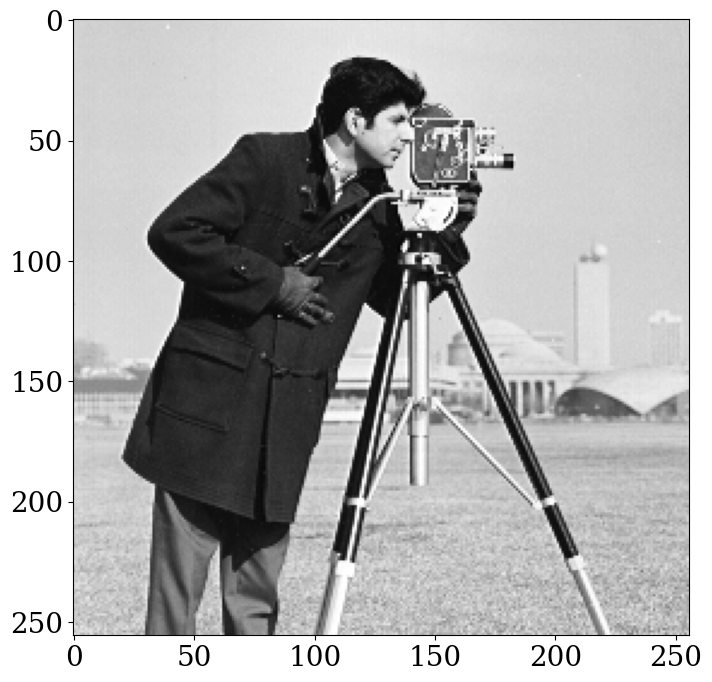

In [5]:
# --- Import and show the image

x = np.array(Image.open("cman.png")).astype(np.float64)

# --- Image dimension
nx,ny = [x.shape[0],x.shape[1]]
dimx = nx*ny

fig,ax = plt.subplots()
plt.imshow(x, cmap="gray")

#  --- Convert to torch tensor
x = torch.from_numpy(x).to(device).detach().clone()

## Define a forward operator.

In this case, $A$ will be a linear operator applying a [box blur](https://en.wikipedia.org/wiki/Box_blur) $h$ of size 9 by 9 pixels.

In [6]:
# Forming a 9x9 uniform blurring operator
# --- Uniform blur kernel 
h = torch.ones(9)
lh = len(h)
h = h/torch.sum(h)
# --- end (blur kernel

# --- padding with 0 to the image size to get the forward operator
h = torch.cat((h,torch.zeros(nx-lh)))
h = cshift(h, -(lh-1)/2)
h = h.reshape(-1, 1) @ h.reshape(1, -1)
# --- end (forward operator)

Note that the forward operator $A$ is a circulant matrix. Therefore, we express the convolution in the Fourier domain as follows 
$$ h*x = Ax = \mathcal{F}^{-1}\left(\mathcal{F}(A)\cdot\mathcal{F}(x)\right),$$
where 
* $\mathcal{F}$ and $\mathcal{F}^{-1}$ are respectively the forward and inverse discrete Fourier transform operators;
* $h$ is the blur kernel used to form the forward operator $A$;
* The dot $\cdot$ denotes pointwise multiplication.

In [7]:
# --- A and A' operators in the fourier domain
A_FFT = torch.fft.fft2(h).to(device)
AC_FFT = torch.conj(A_FFT)

# --- A operator
A = lambda x: torch.fft.ifft2(A_FFT * torch.fft.fft2(x)).real

# --- At transpose operator
AT = lambda x: torch.fft.ifft2(AC_FFT * torch.fft.fft2(x)).real

# --- AtA operator
ATA = lambda x: torch.fft.ifft2(AC_FFT * A_FFT * torch.fft.fft2((x))).real

## Degraded measurement
$$y = Ax + \omega$$

	 the noise variance is: 3.6793757115858674	min = 0.11635207616114121 	 max = 116.35207616114121



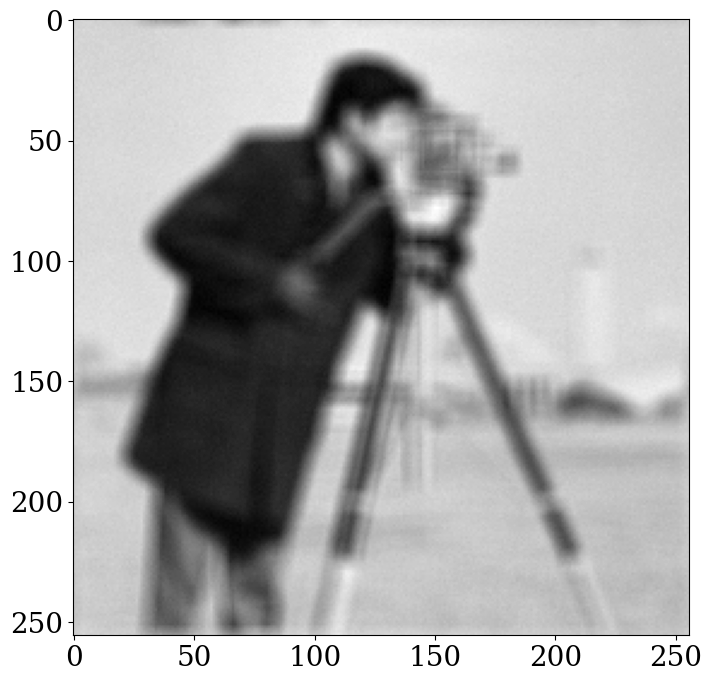

In [8]:
# --- generate the blurred and noisy observation 'y'
Ax = A(x)

BSNR = 30 # we will use this noise level

min_BSNR = 15
max_BSNR = 45
# Define a convex set for sigma2.

min_sigma2= (torch.linalg.matrix_norm(Ax-torch.mean(Ax), ord='fro')/math.sqrt(dimx*10**(max_BSNR/10)))**2
max_sigma2= (torch.linalg.matrix_norm(Ax-torch.mean(Ax), ord='fro')/math.sqrt(dimx*10**(min_BSNR/10)))**2
sigma2_init = (min_sigma2 + max_sigma2) / 2

# --- sigma2
sigma = torch.linalg.matrix_norm(Ax-torch.mean(Ax), ord='fro')/math.sqrt(dimx*10**(BSNR/10))

# --- observed data
y = Ax + sigma*torch.randn_like(x)

fig, ax = plt.subplots()
ax.imshow(y.cpu().numpy(),cmap='gray')

# --- noise variance
print(f"\t the noise variance is: {sigma**2}\tmin = {min_sigma2} \t max = {max_sigma2}\n")

## Define the likelihood
The log likelihood also termed data fidelity is given by
$$f^{\sigma^2}_y(x) = \dfrac{||y - Ax||^2_F}{2\sigma^2}.$$
Here $\lVert \cdot\rVert_F$ denotes the Frobenius norm, note that although we introduced the image as a vector in $\mathbb{R}^d$ it is more convienent here to consider the image as a $2$-dimensional array.

In [9]:
f = lambda z, sigma2: (torch.linalg.norm(y-A(z),'fro')**2)/(2*sigma2)   # Negative log-likelihood -logp(t|x,sigma^2)

# --- Gradient w.r.t. sigma^2
df_wrt_sigma2 = lambda z, sigma2: (torch.linalg.norm(y - A(z),'fro')**2) / (2*sigma2**2)   - dimx / (2*sigma2)

The gradient $ x \mapsto \nabla f^{\sigma^2}_y(x)$ is defined by
$$\nabla f^{\sigma^2}_y(x) = \dfrac{A^T(Ax - y)}{\sigma^2}.$$

In [10]:
# gradient of the negative log-likelihood
ATy = AT(y)
df_wrt_x = lambda x, sigma2: (ATA(x) - ATy) / sigma2        

## Define a prior

In this assignment, we will consider a prior based on the total variation (TV) norm

$$p(x) \propto e^{- \theta ||x|| _{TV}}\,\,,$$

and so $g(x)=||x|| _{TV}$ where $||x|| _{TV}=\sum_{i,j}^{}\sqrt{|x_{i+1,j}-x_{i,j}|^2+|x_{i,j+1}-x_{i,j}|^2}$. The intuition behind TV norm is that it preserves the edges and smooths the flatter regions of the image. The function `g_fun()` calculates the $||\cdot|| _{TV}$. 

In [11]:
# Only the TV norm function for monitoring

g_fun = lambda z: tv(Grad_Image(z))           


We should note that $g(x)=||\cdot||_{TV}$ is not a smooth function. To smooth it, we will consider the Moreau-Yosida (MY) envelope as we discussed above.

For a function $g$, the function `proxg()` below calculates the proximity operator 

$$\mathrm{prox}_{g}^{\lambda}(x)=\mathrm{argmin}_{u\in\mathbb{R}^{M}}\{g(u)+(2\lambda)^{-1}||u-x||^{2}\}\,\,.$$

For a function $g$, the function `gradg()` calculates $$\nabla g^{\lambda}(x)=\lambda^{-1}(x-\mathrm{prox}_{g}^{\lambda}(x))$$


In [12]:
#proxg = lambda x,lam: chambolle_prox_TV(x,lam,25) 
proxg = lambda x, lam: chambolle_prox_TV(x,{'lambda' : lam, 'MaxIter' : 25}) # proximity operator
gradg = lambda x, lam, lambda_prox: (x - proxg(x,lam)) / lambda_prox    # gradient of the prior

## Define the log-posterior

In [13]:
logPi = lambda z,sigma2, theta:   (- f(z,sigma2) - theta * g_fun(z))    # Log of posterior distribution

## Setting the algorithm parameters

Since an MCMC algorithm needs to be implemented- as this is explained above - we will need to choose the step-size $\gamma_{k}$. In order to converge, we need to take $\gamma_{k} < 1/L$ where $L=L_{f^{\sigma^2}_{y}} + L_{\tilde{g}^{\lambda}}$ with $L_{f^{\sigma^2}_{y}}$ being the Lipschitz constant of $f^{\sigma^2}_{y}$ and $L_{\tilde{g}^{\lambda}}$ the Lipschitz constant of $\tilde{g}^{\lambda}$.

In this assignment, we will consider $\gamma_{k} = 0.98/L$ and $\lambda=1/L$.

In [14]:
## Lipschitz Constants

# --- Maximum eigenvalue of operator A. Norm of blurring operator.
AAt_norm = max_eigenval(A, AT, nx, 1e-4, int(1e4), 0) 

# Lipshcitz constant of f.
Lp_fun = lambda sigma2: AAt_norm**2 / sigma2  
L_f =  min(Lp_fun(min_sigma2), Lp_fun(max_sigma2))  

# --- regularization parameter of proximity operator (\lambda).
lambdaMax = 2
lambda_prox = min((5/L_f), lambdaMax)   
# --- end

# --- Lipshcitz constant of g.
L_g =  1/lambda_prox 

# --- Lipshcitz constant of g + f
L =  L_f + L_g
# --- end

# --- Stepsize of MCMC algorithm.
gamma = 0.98*1/L
# --- end

Regarding the projected gradient algorithm parameters and without providing more details, we will consider  $\delta_{n} = c_{0} n^{-0.8}$ as a stepsize for the optimization algorithm where $c_{0} = 10\cdot\theta_{0} d^{-1}$.

In [15]:
# --- Initialization of parameter theta
th_init = 0.01

# --- Admisible set for \theta (min and max values).
min_th = 0.001
max_th = 1

# --- define stepsize delta 
d_exp = 0.8
delta = lambda i: (i**(-d_exp)) / dimx 

# --- constant to tune the stepsize of each parameter
c_theta = 10
c_sigma2 = 10000

## Stochastic Approximation Proximal Gradient (SAPG) algorithm



Initializations for the MCMC and optimization algorithms

In [16]:

# --- Warmup period for the MCMC sampling
warmupSteps = 1000

# --- total number of iterations for the optimization algorithm on theta
total_iter = 2500

# --- burn-in period for the optimization algorithm on theta
burnIn = int(total_iter * 0.8)

For a fixed value $\theta_{0}$ and $\sigma^2_0$, we run the MCMC sampler as this is defined above to warm it up. 

In [17]:
# --- Initialization of the warm-up chain
X_wu = y.to(device).detach().clone()

#Run MYULA sampler with fix theta and fix sigma^2 to warm up the markov chain

fix_sigma2 = sigma2_init
fix_theta = th_init

print('Running Warm up     \n')

for k in tqdm(range(1,warmupSteps)):
    # --- Gradients
    gradf_X_wu = df_wrt_x(X_wu, fix_sigma2)
    gradg_X_wu = gradg(X_wu, lambda_prox*fix_theta, lambda_prox)
    # --- end (gradients)
    
    # --- MYULA warm-up
    X_wu =  X_wu - gamma*gradg_X_wu - gamma*gradf_X_wu + math.sqrt(2*gamma)*torch.randn_like(X_wu)
    # --- end (warm-up)

Running Warm up     



  0%|          | 0/999 [00:00<?, ?it/s]

For stability reasons, we will work on a logarithmic scale. So we define an auxiliary variable $\eta$ such that $\theta_{n} = e^{\eta_{n}} \iff	\eta_{n} = \log\theta_{n}$.

In [18]:
# Keeping track of the reg. parameter's trace
theta_trace = torch.zeros(total_iter)
theta_trace[0] = th_init

sigma2_trace= torch.zeros(total_iter)
sigma2_trace[0]= sigma2_init

# We work on a logarithmic scale, so we define an axiliary variable 
#eta such that theta=exp{eta}. 

eta_init = math.log(th_init)
min_eta = math.log(min_th)
max_eta = math.log(max_th)

eta_trace = torch.zeros(total_iter)
eta_trace[0] = eta_init

# Stop criteria (relative change tolerance) for the proximal gradient algorithm

stopTol=1e-5

***Note:*** The intuition behind the SAPG algorithm is that for each update of $\theta$, we need to "update"
the MCMC sampler for the new value. Therefore, to compute
$\theta^{*}$, we can build a sequence $(\theta_{n})_{n\in\mathbb{N}}$ associated with the following recursion for any $n\in\mathbb{N}$

$$\theta_{n+1} = \Pi_{\Theta_\theta}[\theta_{n} + \delta_{n}\Delta_{m_{n},\theta_{n}}]\,\,,$$

where $$\Delta_{m_{n},\theta_{n}} = - \dfrac{1}{m_{n}}\sum_{i=1}^{m_{n}}g(X_{i}) - \nabla_{\theta}\log (Z(\theta_{n})).$$

Sarting from some $\theta_{0}\in\Theta_\theta$, and where $(m_{n})_{n\in\mathbb{N}}$ is a sequence of non-decreasing sample sizes.

Similarly, we generate a sequence the noise variance $(\sigma^2_{n})_{n\in\mathbb{N}}$ as follows
$$\sigma^2_{n+1} = \Pi_{\Theta_{\sigma^2}}[\sigma^2_{n} + \delta_{n}\Delta^{\sigma^2}_{m_{n},\sigma^2_{n}}]\,\,,$$

where $$\Delta^{\sigma^2}_{m_{n},\sigma^2_{n}} =  \dfrac{1}{m_{n}}\sum_{i=1}^{m_{n}}\dfrac{||y - AX_i||^2_F}{2(\sigma^2)^2)} - \dfrac{d}{2\sigma^2}.$$

Empirically, we have seen that taking $m_{n} = 1$ $\forall n\in\mathbb{N}$ is enough. This means that after each update of $\theta$ and $\sigma^2$, we need to run 1 iteration of the MCMC sampler.

To monitor the behaviour of the SAPG algorithm, we need to store two quantities: the log-posterior trace (without the normalizing constant) and the log-prior trace (without the normalizing constant).

In [19]:
print('\nRunning SAPG algorithm     \n')
# We want to keep track of two traces: the log-likelihood and the TV function to monitor the behaviour of the algorithm.

logPiTraceX = []      # to monitor convergence
g_trace = []          # to monitor how the regularisation function evolves

mean_theta =[]
mean_sigma2 = []
Grad_sigma2 = []

X = X_wu.clone()       # start MYULA markov chain from last sample after warmup


for k in tqdm(range(1,total_iter)): 

    ################################################################################
    # MCMC SAMPLER
    ################################################################################

    # Number of samples

    m = 1

    # If we run the MCMC sampler for m times to get m samples X_m, therefore we need to average 
    # gradients w.r.t. \theta and \sigma^2 before the update
    g_mcmc_trace = torch.zeros(m).to(device) 
    grad_sigma2_trace = torch.zeros(m).to(device) 
    
    #Sample from posterior with MYULA:
    
    for ii in range(m):

        # Calculate the gradient related to g for the current theta
        gradgX = gradg(X,lambda_prox*theta_trace[k-1],lambda_prox)  
        
        # --- Calculate the gradient related to f for the current theta
        gradfX = df_wrt_x(X,sigma2_trace[k-1])
        # --- end
        
        # --- MYULA update
        X =  X - gamma*gradgX - gamma*gradfX + math.sqrt(2*gamma)*torch.randn_like(X)
        #X = torch.clamp(X,0,255)
        # --- end
        
        # --- Gardients w.r.t parameters
        g_mcmc_trace[ii] = g_fun(X)
        grad_sigma2_trace[ii] = df_wrt_sigma2(X, sigma2_trace[k-1])
        # --- end
        
    # --- Save current state to monitor convergence
    logPiTraceX.append(logPi(X, sigma2_trace[k-1],theta_trace[k-1]).cpu().numpy())
    g_trace.append(g_mcmc_trace[-1].cpu().numpy())
    # --- end (monitoring)
    
    # ################################################################################
    #  PROJECTED GRADIENT ALGORITHM
    # ################################################################################

    # Update eta and theta. It should be underlined that we work on the logarithmic
    # scale for numerical stability

    # --- update \eta and \theta
    etak = eta_trace[k-1] + c_theta * delta(k)  * (dimx / theta_trace[k-1] - torch.mean(g_mcmc_trace)) * torch.exp(eta_trace[k-1]) 

    # project \eta onto the admissible set of value
    eta_trace[k] = min(max(etak,min_eta),max_eta)
    
    # Save the value of theta
    theta_trace[k] = torch.exp(eta_trace[k])
    # --- end (update)
    
    # --- Update sigma^2
    sigma2_k = sigma2_trace[k-1] + c_sigma2 * delta(k) * torch.mean(grad_sigma2_trace)

    sigma2_trace[k] = min(max(sigma2_k, min_sigma2), max_sigma2)
    # --- end (update)
    
    # -- 
    Grad_sigma2.append(df_wrt_sigma2(X, sigma2_trace[k-1]).cpu().numpy())
    if k % int(total_iter/10) == 0:
        print(f"iter = {k} \t Theta = {theta_trace[k]} \t sigma2 = {sigma2_trace[k]}\n")
   
    # --- Check stop criteria. If relative error is smaller than op.stopTol stop
    
    if k>burnIn+1:
        mean_theta.append(torch.mean(theta_trace[burnIn:(k+1)]).cpu().numpy())
        mean_sigma2.append(torch.mean(sigma2_trace[burnIn:(k+1)]).cpu().numpy())
        
        relErrTh1 = torch.abs(torch.mean(theta_trace[burnIn:(k+1)]) - torch.mean(theta_trace[burnIn:k])) / torch.mean(theta_trace[burnIn:k])
        
        relErrSi1 = torch.abs(torch.mean(sigma2_trace[burnIn:(k+1)]) - torch.mean(sigma2_trace[burnIn:k])) / torch.mean(sigma2_trace[burnIn:k])

        if (relErrTh1<stopTol) and (relErrSi1<stopTol) and 1 == 2 :
            
            print("Toleration reached!")
            break
     # --- end (stop criteria)       

# --- Collecting data
last_samp = k

logPiTraceX = logPiTraceX[:last_samp+1]
gXTrace = g_trace[:last_samp+1]

theta_EB = torch.exp(torch.mean(eta_trace[burnIn:last_samp+1]))
last_theta = theta_trace[last_samp]
thetas = theta_trace[:last_samp+1]

sigma2_EB = torch.mean(sigma2_trace[burnIn:last_samp+1])
sigmas=sigma2_trace[:last_samp+1]


Running SAPG algorithm     



  0%|          | 0/2499 [00:00<?, ?it/s]

iter = 250 	 Theta = 0.016556745395064354 	 sigma2 = 6.223448276519775

iter = 500 	 Theta = 0.017674647271633148 	 sigma2 = 4.494040489196777

iter = 750 	 Theta = 0.018680881708860397 	 sigma2 = 3.805351734161377

iter = 1000 	 Theta = 0.01956116408109665 	 sigma2 = 3.6240081787109375

iter = 1250 	 Theta = 0.020173298195004463 	 sigma2 = 3.5673208236694336

iter = 1500 	 Theta = 0.020860381424427032 	 sigma2 = 3.5005805492401123

iter = 1750 	 Theta = 0.021365582942962646 	 sigma2 = 3.501664161682129

iter = 2000 	 Theta = 0.02191474661231041 	 sigma2 = 3.4689090251922607

iter = 2250 	 Theta = 0.022323045879602432 	 sigma2 = 3.467817544937134



# Results

In [20]:
print("Estimated theta: ", theta_EB)
print("Last theta: ", last_theta)
print("Estimated value of σ2 ",sigma2_EB, sigma**2)

Estimated theta:  tensor(0.0223)
Last theta:  tensor(0.0226)
Estimated value of σ2  tensor(3.4756) tensor(3.6794, dtype=torch.float64)


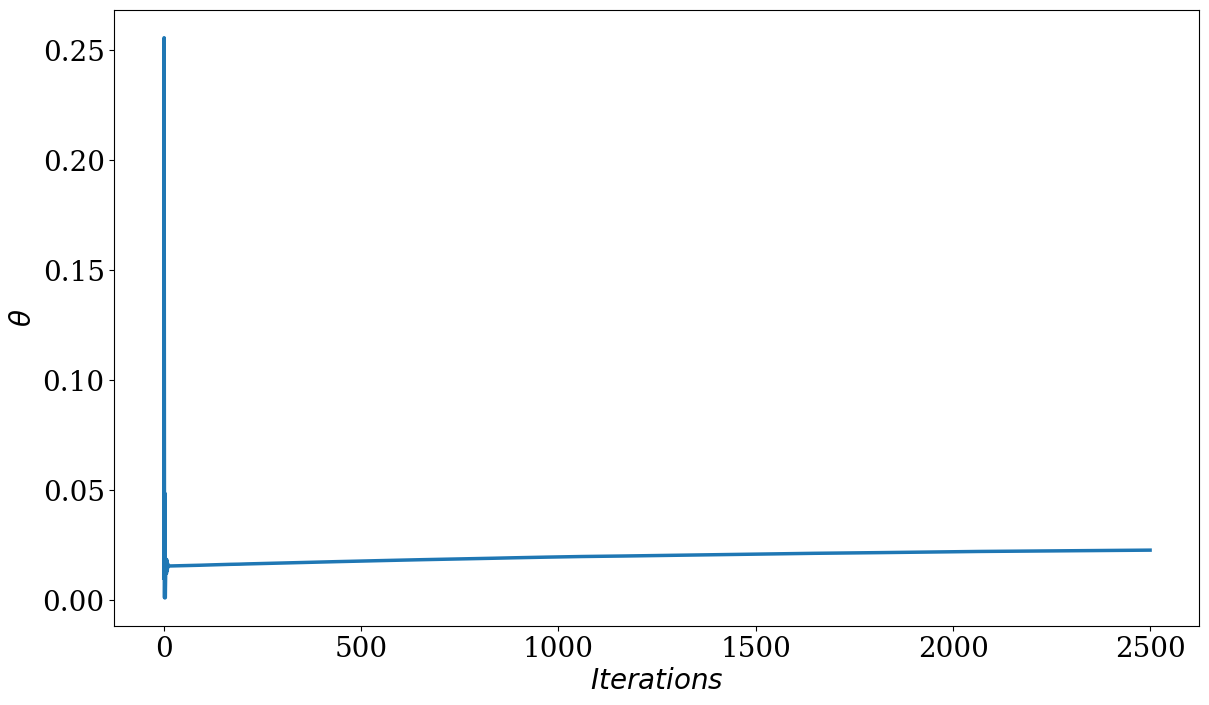

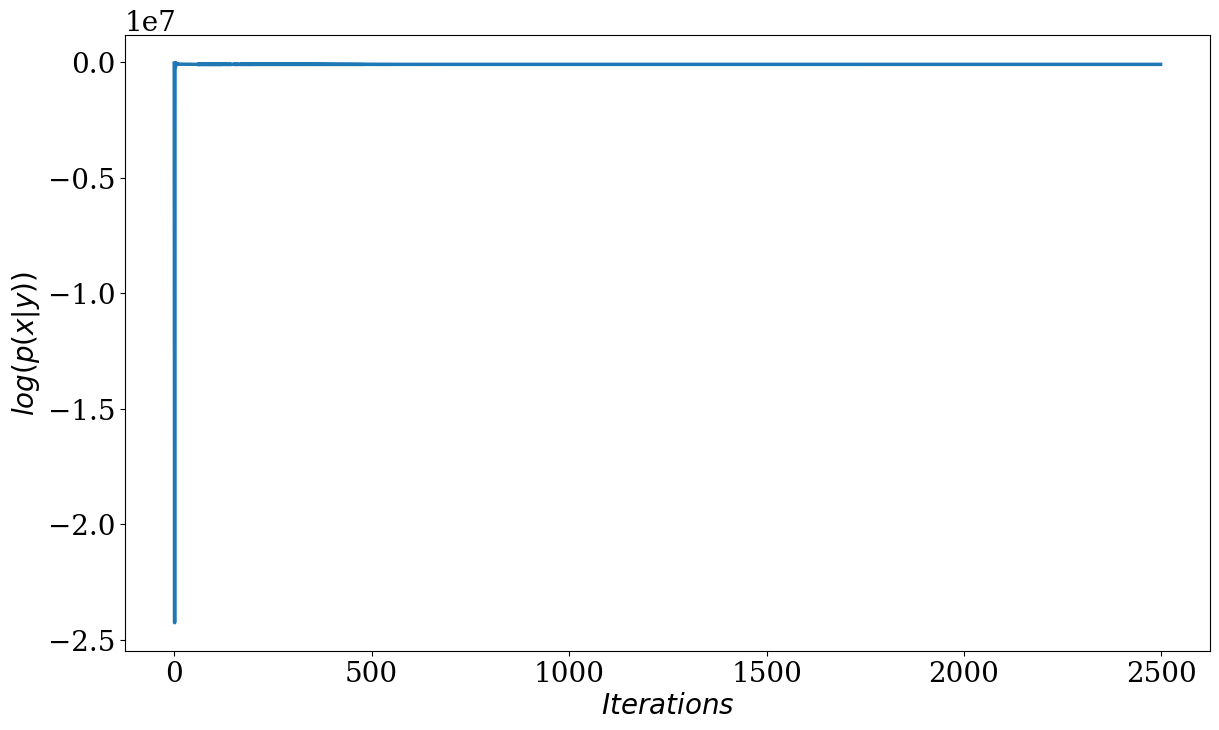

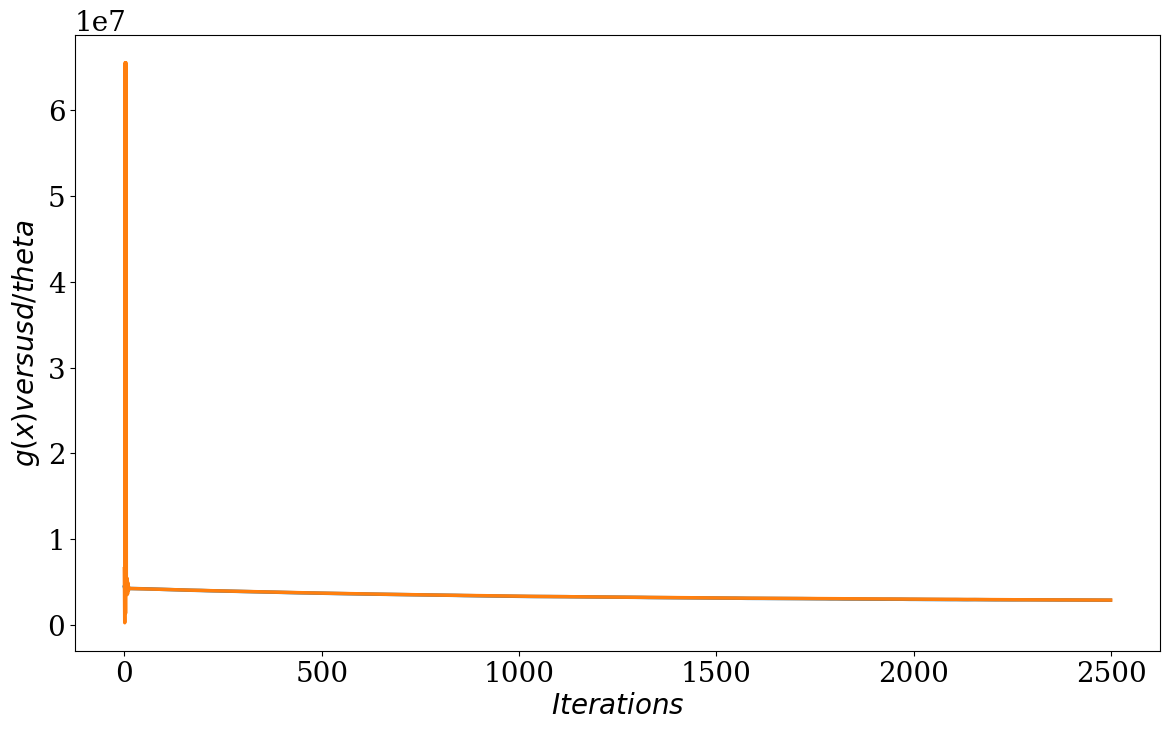

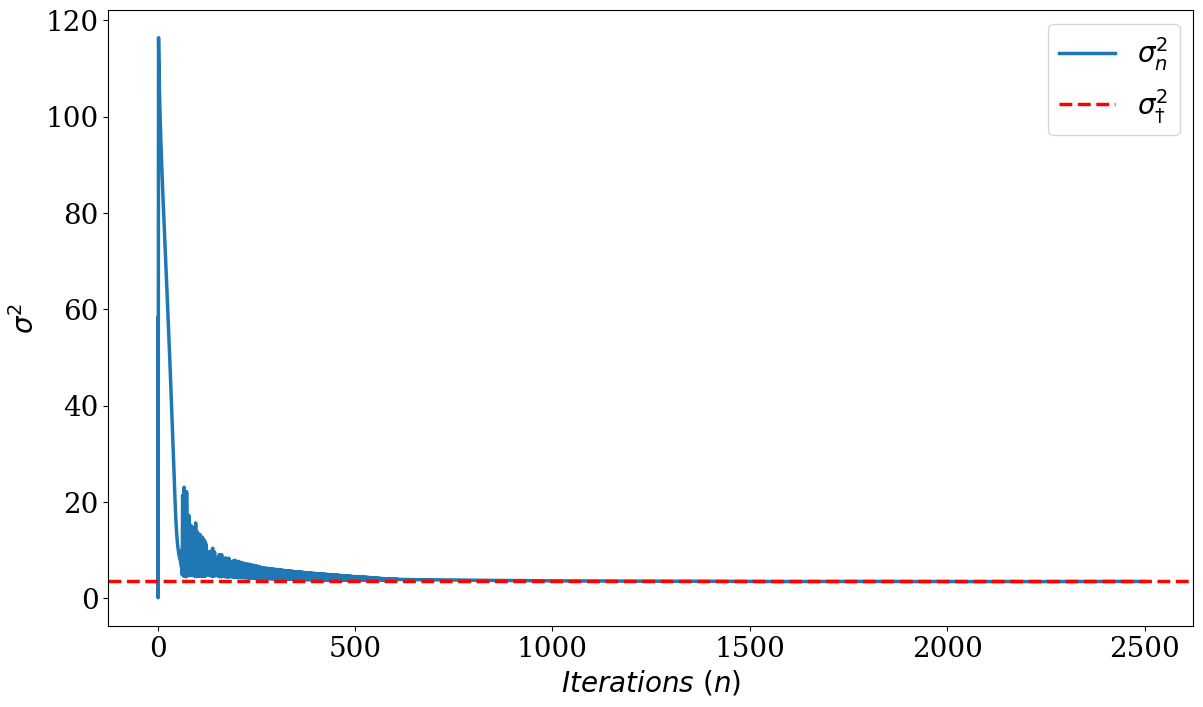

In [21]:
# Plot the results

plot1 = plt.figure()
plt.plot(thetas[:].cpu().numpy(),linestyle="-")
plt.xlabel("$Iterations$")
plt.ylabel("$θ$")

plot1 = plt.figure()
plt.plot( logPiTraceX,linestyle="-")
plt.xlabel("$Iterations$")
plt.ylabel("$log(p(x|y))$")

plot1 = plt.subplots()
plt.plot( gXTrace[:],linestyle="-")
plt.plot( 256*256/thetas[:].cpu().numpy(),linestyle="-")
plt.xlabel("$Iterations$")
plt.ylabel("$g(x) versus d/theta$")

fig, ax = plt.subplots()
ax.plot(sigmas.cpu().numpy(),linestyle="-",label="$σ_{n}^{2}$")
plt.axhline(y=sigma.cpu().numpy()**2, color='r', linestyle='--',label="$σ_{\dagger}^{2}$")
#plt.ylim(min_sigma2, max_sigma2)
ax.set_xlabel("$Iterations\,\,(n)$")
ax.set_ylabel("$σ^{2}$")
ax.legend()